## Have to convince our client to buy our data analytics solution

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('GSAF5.csv', encoding='ISO-8859-1')

In [3]:
data.head(50)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


## Cleaning and wrangling

In [4]:
#First I want to get a general idea of the data set
# I can already see that the columns Unnamed 22 and Unnamed 23 can be probably dropped
# 'Age', 'Time', 'Species' also have a lot of Nulls, but not enough to delete them. Besides, they sound like important datapoints

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [5]:
#Since it's just two columns I want to drop, I could do it manually 
#but for the sake of the project let's write a code for it

#counting the Nulls for each column
null_cols = data.isnull().sum()

#listing only the columns containing mora than 4K Nulls
drop_cols = list (null_cols [null_cols > 4000].index)
print(drop_cols)

['Unnamed: 22', 'Unnamed: 23']


In [6]:
#before deleting lets make sure they don't contain anything important

data_drop = data[['Unnamed: 22', 'Unnamed: 23']]
data_drop_filt = data_drop.dropna(thresh=1)
data_drop_filt.head(5)

,Unnamed: 22,Unnamed: 23
1247,stopped here,NaN
4182,NaN,Teramo
5585,NaN,change filename


In [7]:
#The non-null cells don't seem particularly important so we delete them

data = data.drop(drop_cols, axis = 1)

In [8]:
#And they are gone

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 22 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [9]:
#Let's check for duplicates too

data_2 = data[['Case Number', 'Location', 'Name']].drop_duplicates()

len(data)-len(data_2)

2

In [10]:
#since most data points are non-numeric there is no point in looking for IQR-s, outliers and such

In [11]:
#Lets be a bit more specific with the headers and clean them up

data = data.rename(columns={'Species ': 'Species and Size', 'Sex ':'Sex'})

data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species and Size', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [12]:
#Case number, Case Number.1 and Case Number.2 look really similar, lets see if they are redundant

data['Case Number'].equals(data['Case Number.1'])

False

In [13]:
#Apparently they are not the same so we keep them

data['Case Number'].equals(data['Case Number.2'])

False

In [14]:
#Let's see the proportion of incidents by gender
#We better clean up a little bit

data.groupby(['Sex', 'Fatal (Y/N)']).size()

Sex  Fatal (Y/N)
.    Y                 1
F     N                1
     N               455
     UNKNOWN           5
     Y               123
M     N                7
     #VALUE!           1
     N              3482
     UNKNOWN          48
     Y              1285
M    N                 2
N    N                 1
lli  N                 1
dtype: int64

In [15]:
data['Fatal (Y/N)'].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
n             1
#VALUE!       1
F             1
N             1
Name: Fatal (Y/N), dtype: int64

In [16]:
#im sure there is a more elegant way to do this
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.replace('n','N')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.replace('F','N')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.replace(' N','N')
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.replace('N ','N')
indexNames = data[ data['Fatal (Y/N)'] == "#VALUE!"].index
data.drop(indexNames , inplace=True)

In [17]:
data['Fatal (Y/N)'].value_counts()

N          4326
Y          1552
UNKNOWN      94
Name: Fatal (Y/N), dtype: int64

In [18]:
data['Sex'].value_counts()

M      4834
F       585
M         2
.         1
lli       1
N         1
Name: Sex, dtype: int64

In [19]:
data['Sex'] = data['Sex'].str.replace('M ','M')


In [20]:
data['Sex'].value_counts()
indexNames = data[ data['Sex'] == "lli"].index
data.drop(indexNames , inplace=True)
indexNames =(data[ data['Sex'] == "."].index)
data.drop(indexNames , inplace=True)
indexNames =(data[ data['Sex'] == "N"].index)
data.drop(indexNames , inplace=True)

In [21]:
data_gender_group = data['Sex'].value_counts()

In [22]:
data.groupby(['Sex', 'Fatal (Y/N)']).size()

Sex  Fatal (Y/N)
F    N               456
     UNKNOWN           5
     Y               123
M    N              3491
     UNKNOWN          48
     Y              1285
dtype: int64

In [23]:
male =data['Sex']=='M'
female =data['Sex']=='F'


data_male = data[male]
data_female = data[female]

In [24]:
data_male_group = data_male.groupby(['Fatal (Y/N)']).size()
data_male_group
data_female_group = data_female.groupby(['Fatal (Y/N)']).size()
data_female_group

Fatal (Y/N)
N          456
UNKNOWN      5
Y          123
dtype: int64

In [25]:
data_gender_group

M    4836
F     585
Name: Sex, dtype: int64

In [50]:
data['Age'] = data['Age'].apply(pd.to_numeric, errors='coerce')

age_labels = ['<19', '20-34', '35-50', '51-65', '66<']

cutoffs = [20,35,51,66]

data['bins'] = pd.cut(data['Age'],5 , labels=age_labels)


data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species and Size,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,bins
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,<19
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,35-50
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,35-50
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN


In [54]:
data_age = data.groupby(['bins']).size()
data_age

bins
<19      1016
20-34    1433
35-50     575
51-65     161
66<        24
dtype: int64

## Data Vizualization

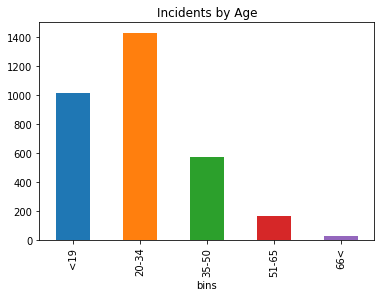

In [61]:
data_age.plot(kind = 'bar', title = 'Incidents by Age')

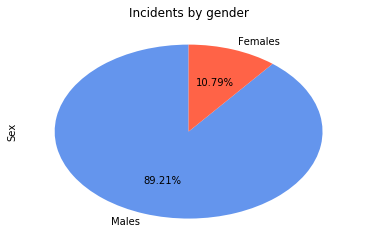

In [36]:
data_gender_group.plot(kind = "pie",y="Fatal (Y/N)",labels=['Males', 'Females'], title = 'Incidents by gender',legend=False, startangle = 90, colors = ['cornflowerblue','tomato'], autopct="%.2f%%")


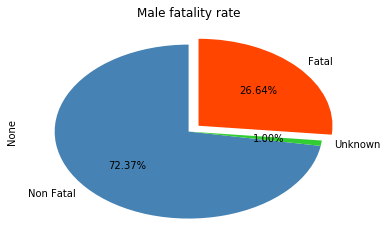

In [27]:
data_male_group.plot(kind = "pie",y="Fatal (Y/N)",labels=['Non Fatal', 'Unknown','Fatal'], title = 'Male fatality rate',legend=False, startangle = 90, colors = ['steelblue','limegreen','orangered'], autopct="%.2f%%", explode = (0,0,0.1))


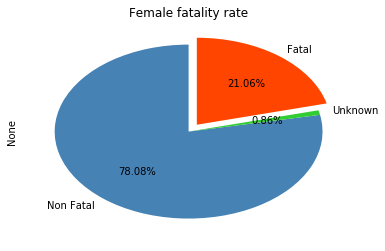

In [28]:
data_female_group.plot(kind = "pie",y="Fatal (Y/N)",labels=['Non Fatal', 'Unknown','Fatal'],title = 'Female fatality rate', legend=False, startangle = 90, colors = ['steelblue','limegreen','orangered'], autopct="%.2f%%", explode = (0,0,0.1))


## Geolocating

In [29]:
areas = data[['Country', 'Area']]

areas_unique = areas.drop_duplicates()

areas_unique.shape

(940, 2)

In [30]:
areas_unique.groupby(['Country']).size()

#areas_unique['Country'] = areas_unique['Country'].str.replace('ST. MAARTIN','ST. MARTIN')
#areas_unique['Country'] = areas_unique['Country'].str.replace('SUDAN?  ','SUDAN')
#areas_unique['Country'] = areas_unique['Country'].str.replace('UNITED ARAB EMIRATES (UAE) ','UNITED ARAB EMIRATES')
#areas_unique['Country'] = areas_unique['Country'].str.replace('YEMEN ','YEMEN')
#areas_unique['Country'] = areas_unique['Country'].str.replace(' TONGA','TONGA')
#areas_unique['Country'] = areas_unique['Country'].str.replace(' PHILIPPINES','PHILIPPINES')

Country
 PHILIPPINES                   1
 TONGA                         2
ADMIRALTY ISLANDS              1
ALGERIA                        1
AMERICAN SAMOA                 1
ANDAMAN / NICOBAR ISLANDAS     1
ANGOLA                         1
ANTIGUA                        1
ARGENTINA                      1
ARUBA                          1
ASIA?                          1
ATLANTIC OCEAN                 7
AUSTRALIA                     14
AZORES                         1
BAHAMAS                       17
BAHREIN                        1
BANGLADESH                     1
BARBADOS                       4
BAY OF BENGAL                  1
BELIZE                         2
BERMUDA                        5
BRAZIL                        11
BRITISH ISLES                  1
BRITISH NEW GUINEA             1
BRITISH VIRGIN ISLANDS         1
BRITISH WEST INDIES            1
BURMA                          2
Between PORTUGAL & INDIA       1
CANADA                         7
CAPE VERDE                     3
  

In [31]:
from opencage.geocoder import OpenCageGeocode

key = '1f32ffb395554498b872c122a4dea09c'
geocoder = OpenCageGeocode(key)


                      

In [32]:
coordinates = []

for i in range(100):
    try:
        query = u'%s;%s' % (areas_unique.iloc[i]['Area'],
                               areas_unique.iloc[i]['Country'])
        results = geocoder.geocode(query)
        latlng = []
        latlng.append(results[0]['geometry']['lat'])
        latlng.append(results[0]['geometry']['lng'])
        coordinates.append(latlng)
    except IndexError:
        pass

In [33]:
import folium

m = folium.Map(location = [30.0,0.0], zoom_start=1.5, tiles = 'CartoDB dark_matter')

In [34]:
for i in coordinates:
    folium.CircleMarker(location = i, radius = 5).add_to(m)

In [35]:
m